# Employee Performance Analysis

In [1]:
# Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# Loading the Data and some basic checks

In [2]:
# to access to Excel support file
!pip install xlrd  

Defaulting to user installation because normal site-packages is not writeable


In [3]:
data1 = pd.read_excel(r"C:\Users\prasa\Downloads\INX_Future_Inc_Employee_Performance.xls") # Reading the Data
data1.head()# it will give you first 5 rows

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [5]:
data1.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data1.values

array([['E1001000', 32, 'Male', ..., 8, 'No', 3],
       ['E1001006', 47, 'Male', ..., 7, 'No', 3],
       ['E1001007', 40, 'Male', ..., 12, 'No', 4],
       ...,
       ['E100994', 50, 'Male', ..., 8, 'No', 3],
       ['E100995', 34, 'Female', ..., 7, 'No', 3],
       ['E100998', 24, 'Female', ..., 0, 'Yes', 2]], dtype=object)

In [7]:
####Check the Duplicate Columns

In [8]:
data1.columns.duplicated().sum()

0

In [9]:
data1.index

RangeIndex(start=0, stop=1200, step=1)

In [10]:
data1.shape

(1200, 28)

In [11]:
data1.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# Domain Analysis

###### INX Future Inc :
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry.



Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points.





##### What is Employee Performance?


*Employee performance is the measure of how well an employee fulfills the duties and responsibilities of their job. It is a combination of a person’s behaviors, skills, abilities, and knowledge in achieving goals within the role. It gauges how an employee works, so organizations can use strategies to channel a positive work environment by sharing constructive feedback and optimizing work performance.

*Work performance affects the overall quality of work within the workplace, which in turn directly influences workplace productivity. The HR department of the organization is responsible for tracking down employees’ performance so that the right decision can be taken. If the employee has been showing great performance activities, he or she can be rewarded or if the person is losing interest, more motivation can be provided.

*To create a culture of performance excellence within the workplace, employers should strive to instill company values throughout the organization. Effective communication skills are paramount in this process, ensuring employees understand performance goals and expectations.

*Managers should also provide regular employee feedback and guidance to help employees understand their own performance and know when they are performing well and when additional help is needed. By creating an environment where performance is rewarded and celebrated, employees will be more engaged in their roles and the quality of work produced.

### Importance of Measuring Employee Performance:-

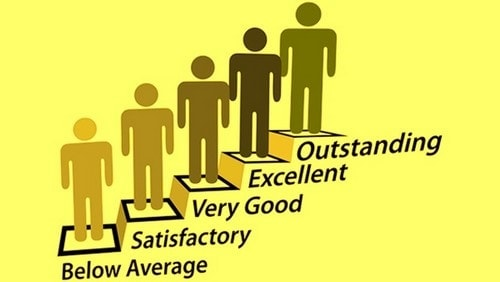

##### 1) Knowing the productivity of the Employees


Often managers do get extremely busy in their daily activities and hence do not have much time in hand to talk about anything extra apart from the projects and the workload. It helps in checking an employee’s accomplishments towards organizational goals.

But it is very much important to discuss the performance of the employees so that it can be known how the employees are performing and if they are performing low, what is the possible reason behind it.

This is the reason, several organizations maintain an evaluation system either once a year or even at a time twice a year. Based on the performance review, the managers talk to the employees to discuss their performance.

#### 2) Staff Development


With the help of work performance knowledge, it can be known which staff is performing in what way.

Based on such an evaluation, the manager can focus on the weakest employee and try different tactics and ways to boost the employee and help the person get developed and show up higher performance in the team.

#### 3) Motivation For The Staff

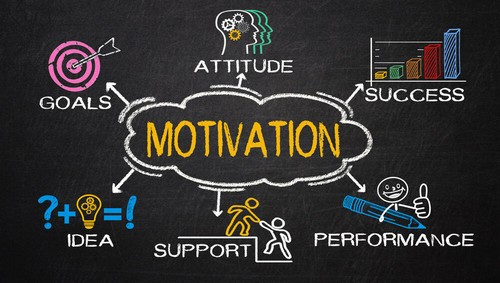

How will you know which staff needs more motivation and which staff can be provided with appreciation? This is the reason, it becomes important to measure up work performance.

There will be employees who are doing great and because of them, the organization is getting high revenue from time to time. You need to appreciate such employees so that they can keep up this job.

On the other hand, some employees are not performing that well. It is important to motivate such employees through different ways such as rewards, words, and others so that they can also perform equally as your star employees.

#### 4) Documentation Of The Performance


There are several times when you may need to decide on upgrading an employee to a senior position. But you cannot simply upgrade an employee only because the position higher to the employee has got vacant.

You need to have a proper evaluation, of whether the person will be able to handle the position well or not. If the person is capable to take care of the position, then only you should raise his responsibilities, otherwise, this can be a waste for your organization.

This cannot be known by one-time performance evaluation. It is important to have a record of the performances to check out the consistency of the employee.

#### 5) Taking Bigger Decisions


There are times when the employer needs to take bigger and more crucial decisions such as eliminating an employee from the team.
Again this cannot be done just by one-time evaluation. It is important to check out the consistency of employee performance so that the right decision can be taken up.

### What factors influence Employee Performance?


For encouraging employees to perform effectively, having such a program that pays heed to below given factors is important------------------------------------------------------------------------------------------------------------------------------------

*Enhancing employee performance through training and development

*Fostering employee involvement

*Having a performance-driven company culture or work culture 

*Using rewards & recognition

*Providing professional growth opportunities to learn new skills

*Having a clear understanding of the company’s objectives and expectations from the employee

*Training and upskilling strategies

*The employee’s comprehension of the products they are selling

*Task assignments should be done strategically, utilizing the skills and abilities of each employee


### Features of the dataset

In [12]:
data1.head(2)

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32   Male           Marketing        Single         Sales   
1  E1001006   47   Male           Marketing        Single         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  

[2 rows x 28 columns]

##### Categorical Features
###### The categorical features further classify themselves into ordinal values, nominal values in the data set.

1.Gender

2.EducationBackground

3.MaritalStatus

4.EmpDepartment

5.EmpJobRole

6.BusinessTravelFrequency

7.OverTime

8.EducationLevel

9.EmpEnvironmentSatisfaction

10.EmpJobLevel

11.EmpJobSatisfaction

12.EmpJobInvolvement

13.EmpRelationshipSatisfaction

14.WorkLifeBalance

15.Attrition
##### Numerical Features
###### These are a set of continuous values the change for one data point to the other.

1.Age

2.DistanceFromHome

3.EmpHourlyRate

4.NumCompaniesWorked

5.EmpLastSalaryHikePercent

6.TotalWorkExperienceInYears

7.TrainingTimesLastYear

8.ExperienceYearsAtThisCompany

9.ExperienceYearsInCurrentRole

10.YearsSinceLastPromotion

11.YearsWithCurrManager

12.Target

##### This is the target to be predicted and the data type here is again categorical that is ordinal to be specific.

******PerformanceRating*******

# Project Goals

## 1: Department Wise Performance Rating Inferences

##### Sales Department

Most of the employees have excellent (3) performance rating
Younger age group performs comparatively better than the older age group although the variation is not high
Job satisfaction and Environment satisfaction is directly correlated to performance rating so the higher the job and environment satisfaction the higher is the performance
Sales Executives and Representatives perform better than their managers in general
New employee or the oldest ones have better performance as compared to those who have moderate experience with current company
Those who have less experience in current role or are relatively new to their current role out perform the experienced ones
Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
###### Development Department

Most of the employees have excellent (3) performance rating
Younger age group or the oldest age group out performs the middle aged employees
Gender wise performance says female perform slightly better than male
Job satisfaction and Environment satisfaction is directly correlated to performance rating so the higher the job and environment satisfaction the higher is the performance
Developers and Tech. lead's out perform other job roles on an average
Experience in current role does not have much effect on the performance rating of employees
Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
##### Research & Development Department

Most of the employees have excellent (3) performance rating
The youngest age group of upto 25 out-performs other age groups by a huge margin
Gender wise performance says female perform slightly better than male
Environment satisfaction is directly correlated to performance rating so the higher the environment satisfaction the higher is the performance
New employee or the oldest ones have better performance as compared to those who have moderate experience with current company
Those who have less experience in current role or are relatively new to their current role out perform the experienced ones
Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
##### Human Resources

Most of the employees have excellent (3) performance rating
age groups upto 30 out perform older age groups
Gender wise performance says female out perform male by some considerable margin
Environment satisfaction is directly correlated to performance rating so the higher the environment satisfaction the higher is the performance
##### Finance Department

Considerably some amount of low performing employees are present as compared to other departments but the rest do have excellent performance
Age group wise those upto 41-50 have good performance
Job satisfaction to performance rating is way below the considerable margin
Environment satisfaction is directly correlated to performance rating so the higher the environment satisfaction the higher is the performance
Sales Executives and Representatives perform better than their managers in general
New employee or the oldest ones have better performance as compared to those who have moderate experience with current company
Those who have less experience in current role or are relatively new to their current role out perform the experienced ones
Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
##### Data Science Department

Most of the employees have excellent (3) performance rating
All age groups have an excellent peformance rating
Job satisfaction and Environment satisfaction is directly correlated to performance rating so the higher the job and environment satisfaction the higher is the performance
Those with low experience in current role tend to perform higher which is relatable as these are the ones trying to get the hang of the department
##### As seen overall the Development and Data science department has a considerably high amount of better performers where as finance department has the highest number of low performing employees as compared to other departments

# EXPLORATORY DATA ANALYSIS

#### Checking the statistical information

In [13]:
data1.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

## Univariate Analysis

In [14]:
data1.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [15]:
data1.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

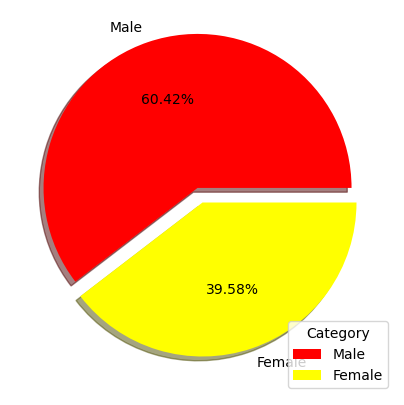

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(5,5))
labels=['Male','Female']
size=data1['Gender'].value_counts()
colors=['red','yellow']
explode=[0.1,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()
plt.tight_layout()


##### In above analysis ,we can see that 60.42% of the Employees are Male and 39.58% of the people are Female...

In [17]:
data1.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

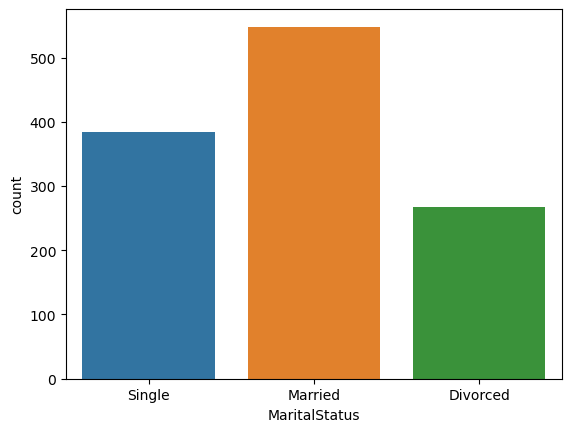

In [18]:
sns.countplot(data = data1, x = 'MaritalStatus', label='Count')

Married,Single,Divorced = data1['MaritalStatus'].value_counts()
#print('Number of people that are Married: ',Married)
#print('Number of people that are Single: ',Single)
#print('Number of people that are Divorced: ',Divorced)

###### In above Countplot we can see that More number of Employees are married as compare to single and divorced.

In [19]:
data1.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [20]:
data1.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

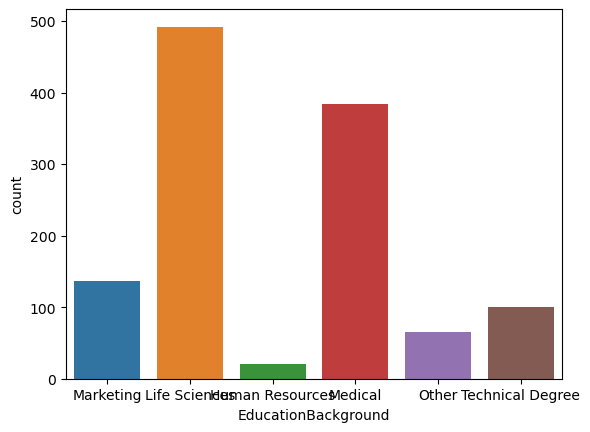

In [21]:
sns.countplot(data = data1, x = 'EducationBackground', label='Count')
data= data1['EducationBackground'].value_counts()
#plt.xticks(rotation=30)

##### In this countplot, we can see more number of Employees has chosen Life science and Medical in their carrier background. 

In [22]:
data1.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [23]:
data1.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

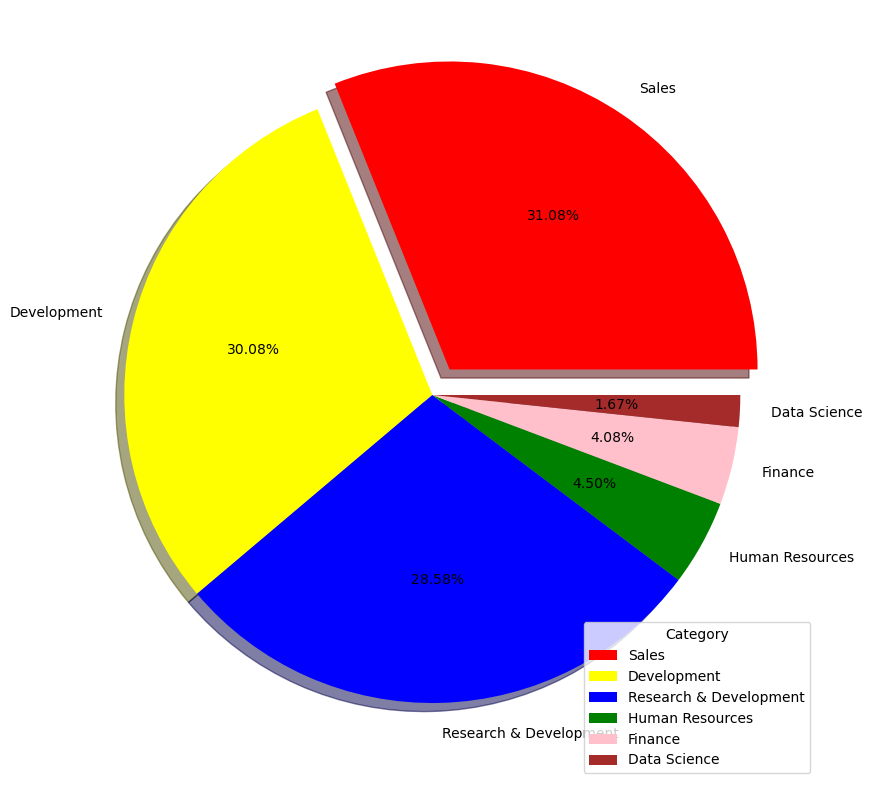

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(10,10))
labels=['Sales','Development','Research & Development','Human Resources','Finance','Data Science']
size=data1['EmpDepartment'].value_counts()
colors=['red','yellow','blue','Green','pink','brown']
explode=[0.1,0,0,0,0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Development'),
  Text(3, 0, 'Data Science'),
  Text(4, 0, 'Research & Development'),
  Text(5, 0, 'Finance')])

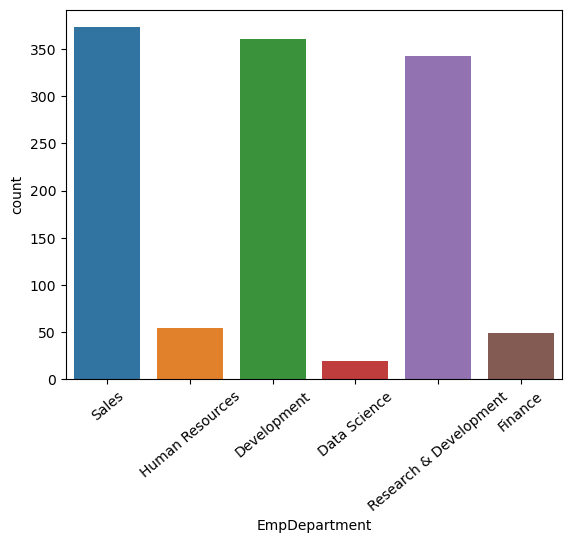

In [25]:
#Checking by Count plot
sns.countplot(data = data1, x = 'EmpDepartment', label='Count')
data= data1['EmpDepartment'].value_counts()
plt.xticks(rotation=40)

##### Above plot we can see,More number of Employees has been working on Sales,development,Research&Development Departments....

In [26]:
data1.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

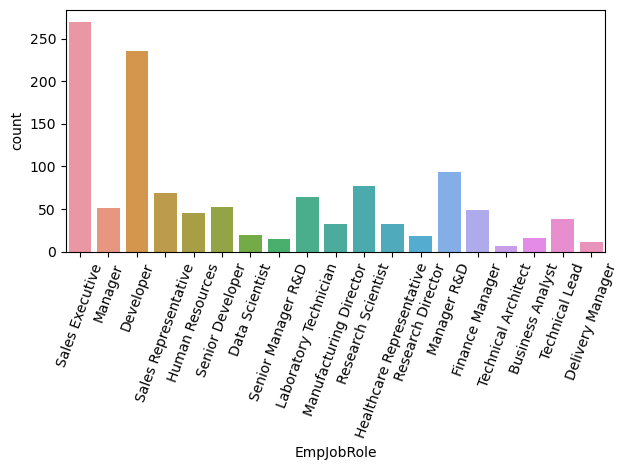

In [27]:
sns.countplot(data = data1, x = 'EmpJobRole', label='Count')
data= data1['EmpJobRole'].value_counts()
plt.xticks(rotation=70)
plt.tight_layout()

##### As compare of other job "Sales Executive" is most popular.because we can see in above plot around 270 number of Employees are working under this job....

In [28]:
data1.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

# Bivariate Analysis

In [29]:
data1.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

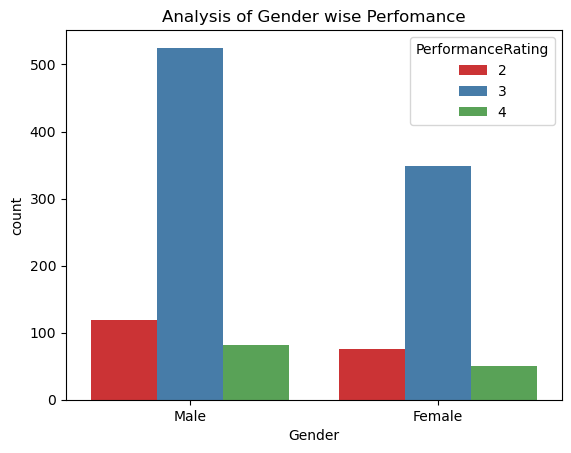

In [30]:
sns.countplot(x='Gender',data=data1,hue='PerformanceRating',palette="Set1")
plt.title('Analysis of Gender wise Perfomance')
plt.show()

##### We can clearly see that around 350 number of female employees and 530 number of male employees gave 3 Star rating....

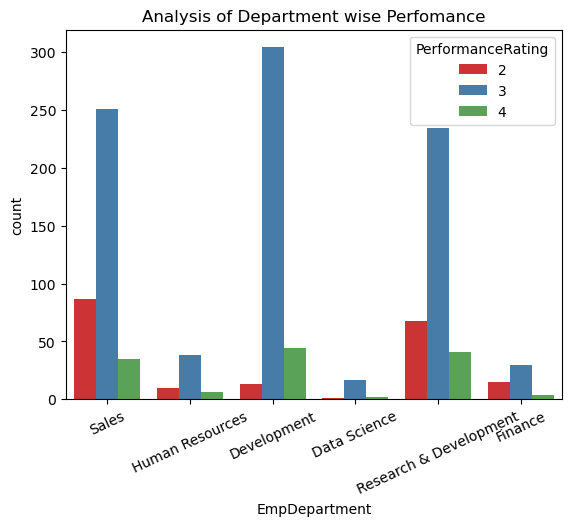

In [31]:
sns.countplot(x='EmpDepartment',data=data1,hue='PerformanceRating',palette="Set1")
plt.title('Analysis of Department wise Perfomance')
plt.xticks(rotation=25)
plt.show()

##### As compare of other department "Develoment" department performance is good.

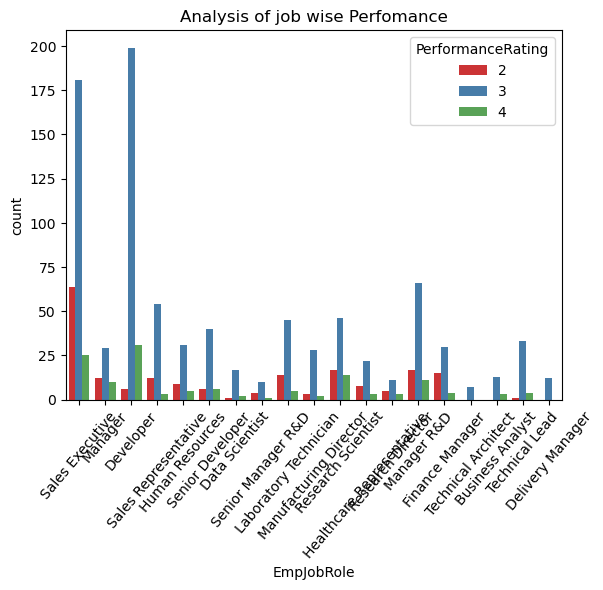

<Figure size 640x480 with 0 Axes>

In [32]:
sns.countplot(x='EmpJobRole',data=data1,hue='PerformanceRating',palette="Set1")
plt.title('Analysis of job wise Perfomance')
plt.xticks(rotation=50)
plt.show()
plt.tight_layout()

In [33]:
data1.Age.value_counts()

34    71
35    64
36    60
31    57
29    51
38    48
32    46
40    46
33    46
27    43
30    42
37    41
28    39
45    36
42    36
26    33
41    32
39    31
44    30
50    28
43    26
46    24
25    24
49    21
24    20
47    20
55    17
54    16
48    16
52    15
53    15
22    15
51    14
56    11
21    11
58    11
23     9
19     8
18     8
20     6
59     6
57     4
60     3
Name: Age, dtype: int64

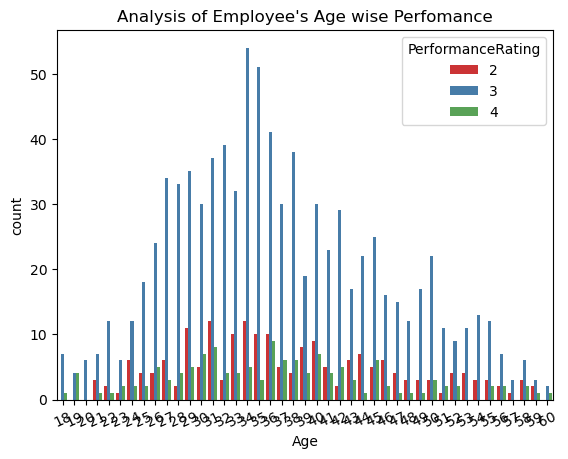

In [34]:
sns.countplot(x='Age',data=data1,hue='PerformanceRating',palette="Set1")
plt.title("Analysis of Employee's Age wise Perfomance")
plt.xticks(rotation=25)
plt.show()

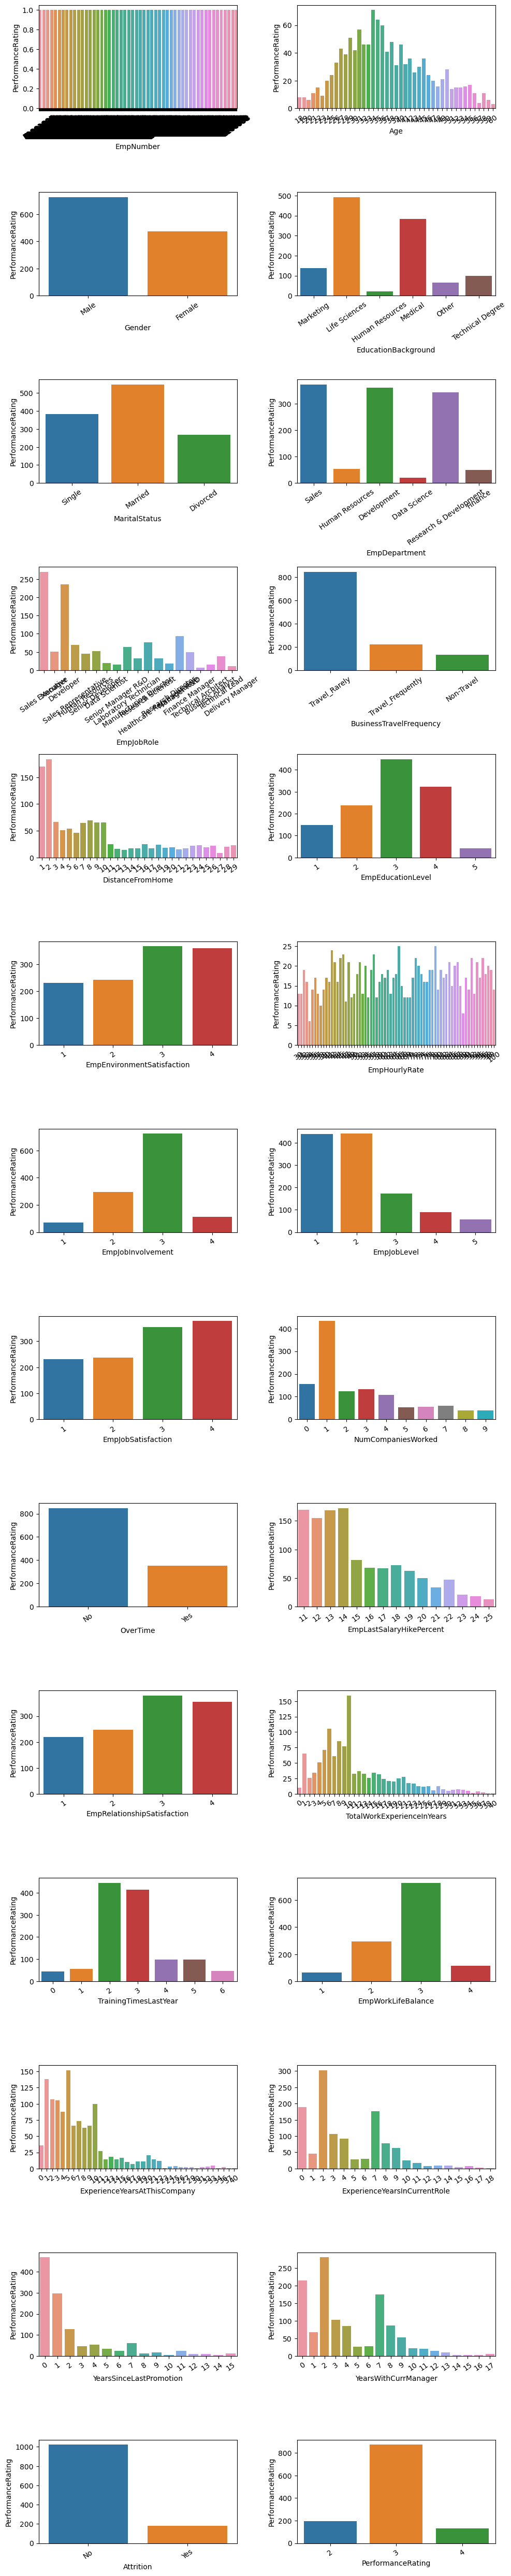

In [35]:
# Plotting how every feature correlate with the "PerformanceRating"
plt.figure(figsize=(10,100), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data1:
    if plotnumber<=28 :
        ax = plt.subplot(28,2,plotnumber)
        sns.countplot(x=data1[column].dropna(axis=0))
        plt.xlabel(column,fontsize=10)
        plt.ylabel('PerformanceRating',fontsize=10)
        plt.xticks(fontsize=10,rotation = 35)
    plotnumber+=1
plt.tight_layout()

# Multivariate Analysis

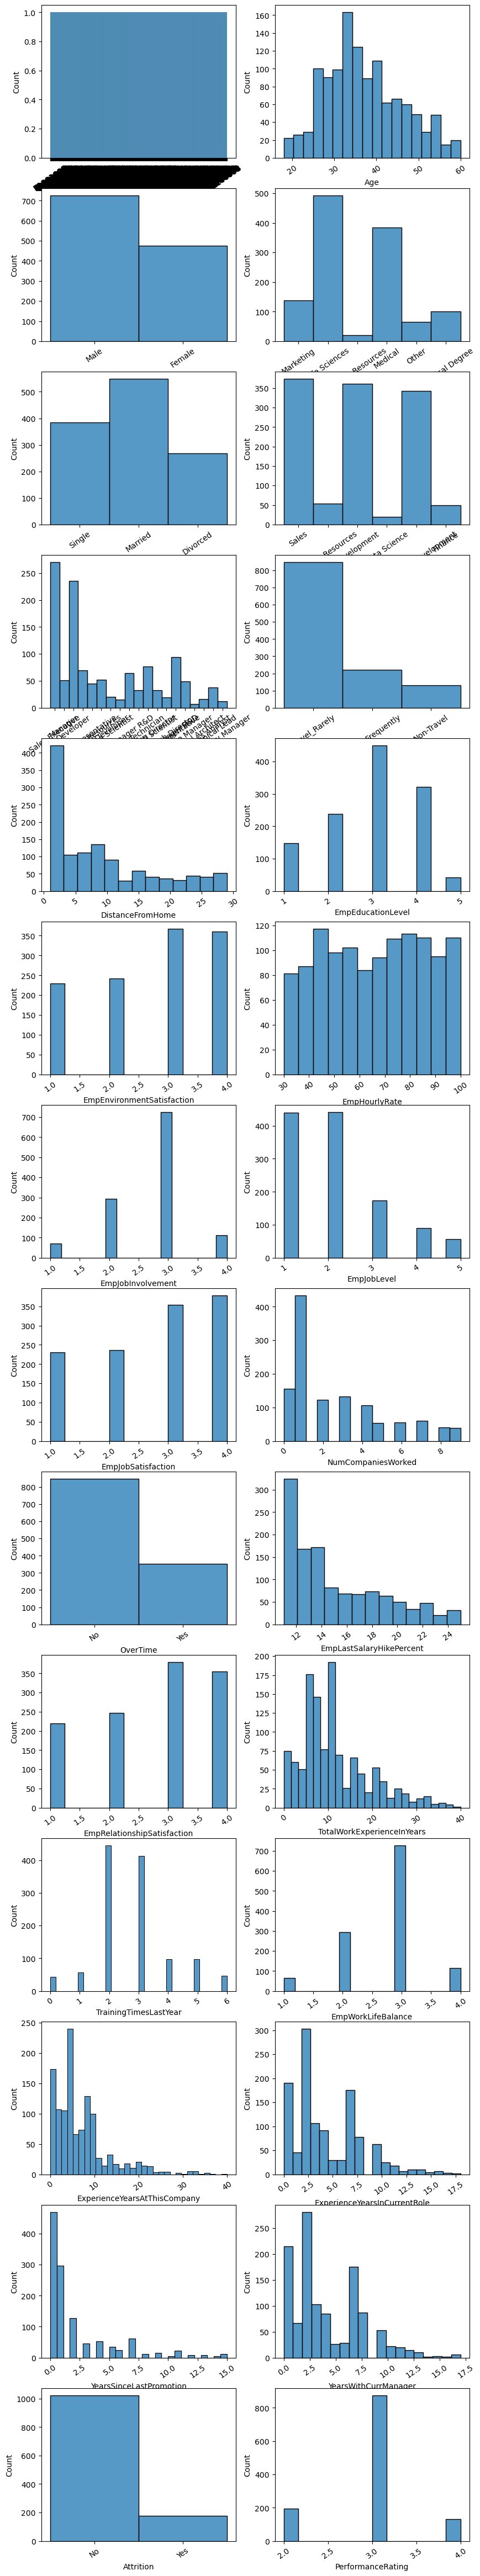

<Figure size 640x480 with 0 Axes>

In [36]:
# let's see how data is distributed for every column
plt.figure(figsize=(10,120), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=28 :
        ax = plt.subplot(28,2,plotnumber)
        sns.histplot(data1[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(fontsize=10,rotation = 35)
        
    plotnumber+=1
plt.show()
plt.tight_layout()

##### All the Above analysis we can see that many employees whose age is 34,35,36,31 respectively their performance wise rating is good .

#### Data distribution of Variables as seen in above plots and pandas profiling generated file

###### # The data distribution can be analyzed for each feature using pandas dataframe .describe() method which gives out the descriptive statistics for each numerical feature. A complete data distribution of each categorical feature is visualized using matplotlib libraries.........

##### Categorical features
Gender distribution: 60.4% male and 39.6% female
Education Background:
Life sciences: 41%
Medical: 32%
Marketing: 11.4%
Technical Degree: 8.3%
Human Resources: 1.8%
Others: 5.5%
Employee Department:
31.1% of the people work in sales
30.1% of the people work in Development
28.6% of people work in Research and development
4.5% in HR
4.1% in Finance
1.7% in Data Science
19 Unique Employee Job Roles are there in the organization with 22.5% Employees working as Sales executive counting as the highest number of employees in any role followed by Developers which are at 19.7% followed by the rest with each role not exceeding 8% of the total employees
Out the given population only 18.5% of the employee's travel frequently, 70.5% of employees do still travel although rarely and the rest do not travel
29.4% of employees do Overtime
85.2% employees does not have attrition

##### Numerical features
The age distribution here can be considered gaussian given its skewness and kurtosis ranging in |1.96|
The highest number of employees fall in the age group of 30 to 45.
The most common education level among employees is 3 or as described in the data definitions Bachelors
The two most common employee environment satisfaction rates are 3 and 4 i.e. high and very high so the environment of the company seems highly satisfactory for the employees
The mean hourly rate is 65.98 with most of the employees earning between the range of 60 to 95
The most common job involvement rating is 3 i.e. high so the employees at this company have a good Job Involvement rate
The distribution also states that around 72% of the employees are in the preliminary job roles of 1 and 2
Around 60% of the employees are highly or very highly satisfied with their jobs

##### Analysis through visualization
Bivariate and multivariate analysis is a little bit tricky and requires some work as compared to univariate analysis. Seaborn to the rescue here. we have used seaborn libraries kernal density estimate plots (kdeplots) to visualize and understand the distribution of one feature with another or in other words to visualize a correlation between two features.
From the data set it is evident that the numerical features have a comparatively high predictive value and hence yet again we invoke seaborn libraries heatmap function to create a heatmap that details out the correlation of each numerical feature including the target with other features which gives out a pretty good idea on the predictive value of each feature

# PREPROCESSING

In [37]:
data1.info()# To check  data type and  null value of all columns...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## 1. Checking Missing values

In [38]:
data1.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

###### There is no Missing values in this Employee data 

In [39]:
data1.describe()#used to view some basic statistical details like percentile, mean, std etc. 

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [40]:
data1.describe(include=['O'])#It will give you info about categorical data/columns

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [41]:
data1.shape

(1200, 28)

## 2.Conversion of categorical column into numerical column

In [42]:
pd.set_option('display.max_columns', None)
data1.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [43]:
data1.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [44]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data1.Gender=lc.fit_transform(data1.Gender)
data1.EducationBackground=lc.fit_transform(data1.EducationBackground)
data1.MaritalStatus=lc.fit_transform(data1.MaritalStatus)
data1.EmpDepartment=lc.fit_transform(data1.EmpDepartment)
data1.EmpJobRole=lc.fit_transform(data1.EmpJobRole)
data1.BusinessTravelFrequency=lc.fit_transform(data1.BusinessTravelFrequency)
data1.OverTime=lc.fit_transform(data1.OverTime)
data1.Attrition=lc.fit_transform(data1.Attrition)


In [45]:
data1.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

## 3.Drop the unique and constant variable

In [46]:
data1.drop('EmpNumber', axis=1, inplace=True)

In [47]:
data1.head(2)

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3

## 4.Conversion object type to int/float type

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int32
 2   EducationBackground           1200 non-null   int32
 3   MaritalStatus                 1200 non-null   int32
 4   EmpDepartment                 1200 non-null   int32
 5   EmpJobRole                    1200 non-null   int32
 6   BusinessTravelFrequency       1200 non-null   int32
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

In [49]:
data1['OverTime'] = data1['OverTime'].astype('int')

In [50]:
data1.head(2)

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3

## 5.Analysing data

#### Analysis


###### * The data is supervised and categorical. The predictor variables are ordinal and a few among them are nominal. The target variable 'Performance Rating' is ordinal.
###### * To analyze the data, various data processing techniques like Label Encoding and Standardization is used. Correlation Coeffecient is used to interpret the relationship between variables. The most important features selected are Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager.
###### * For training the data and predicting the target, algorithms used are Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network.
###### * A separate analysis of Department wise Performance is carried out.

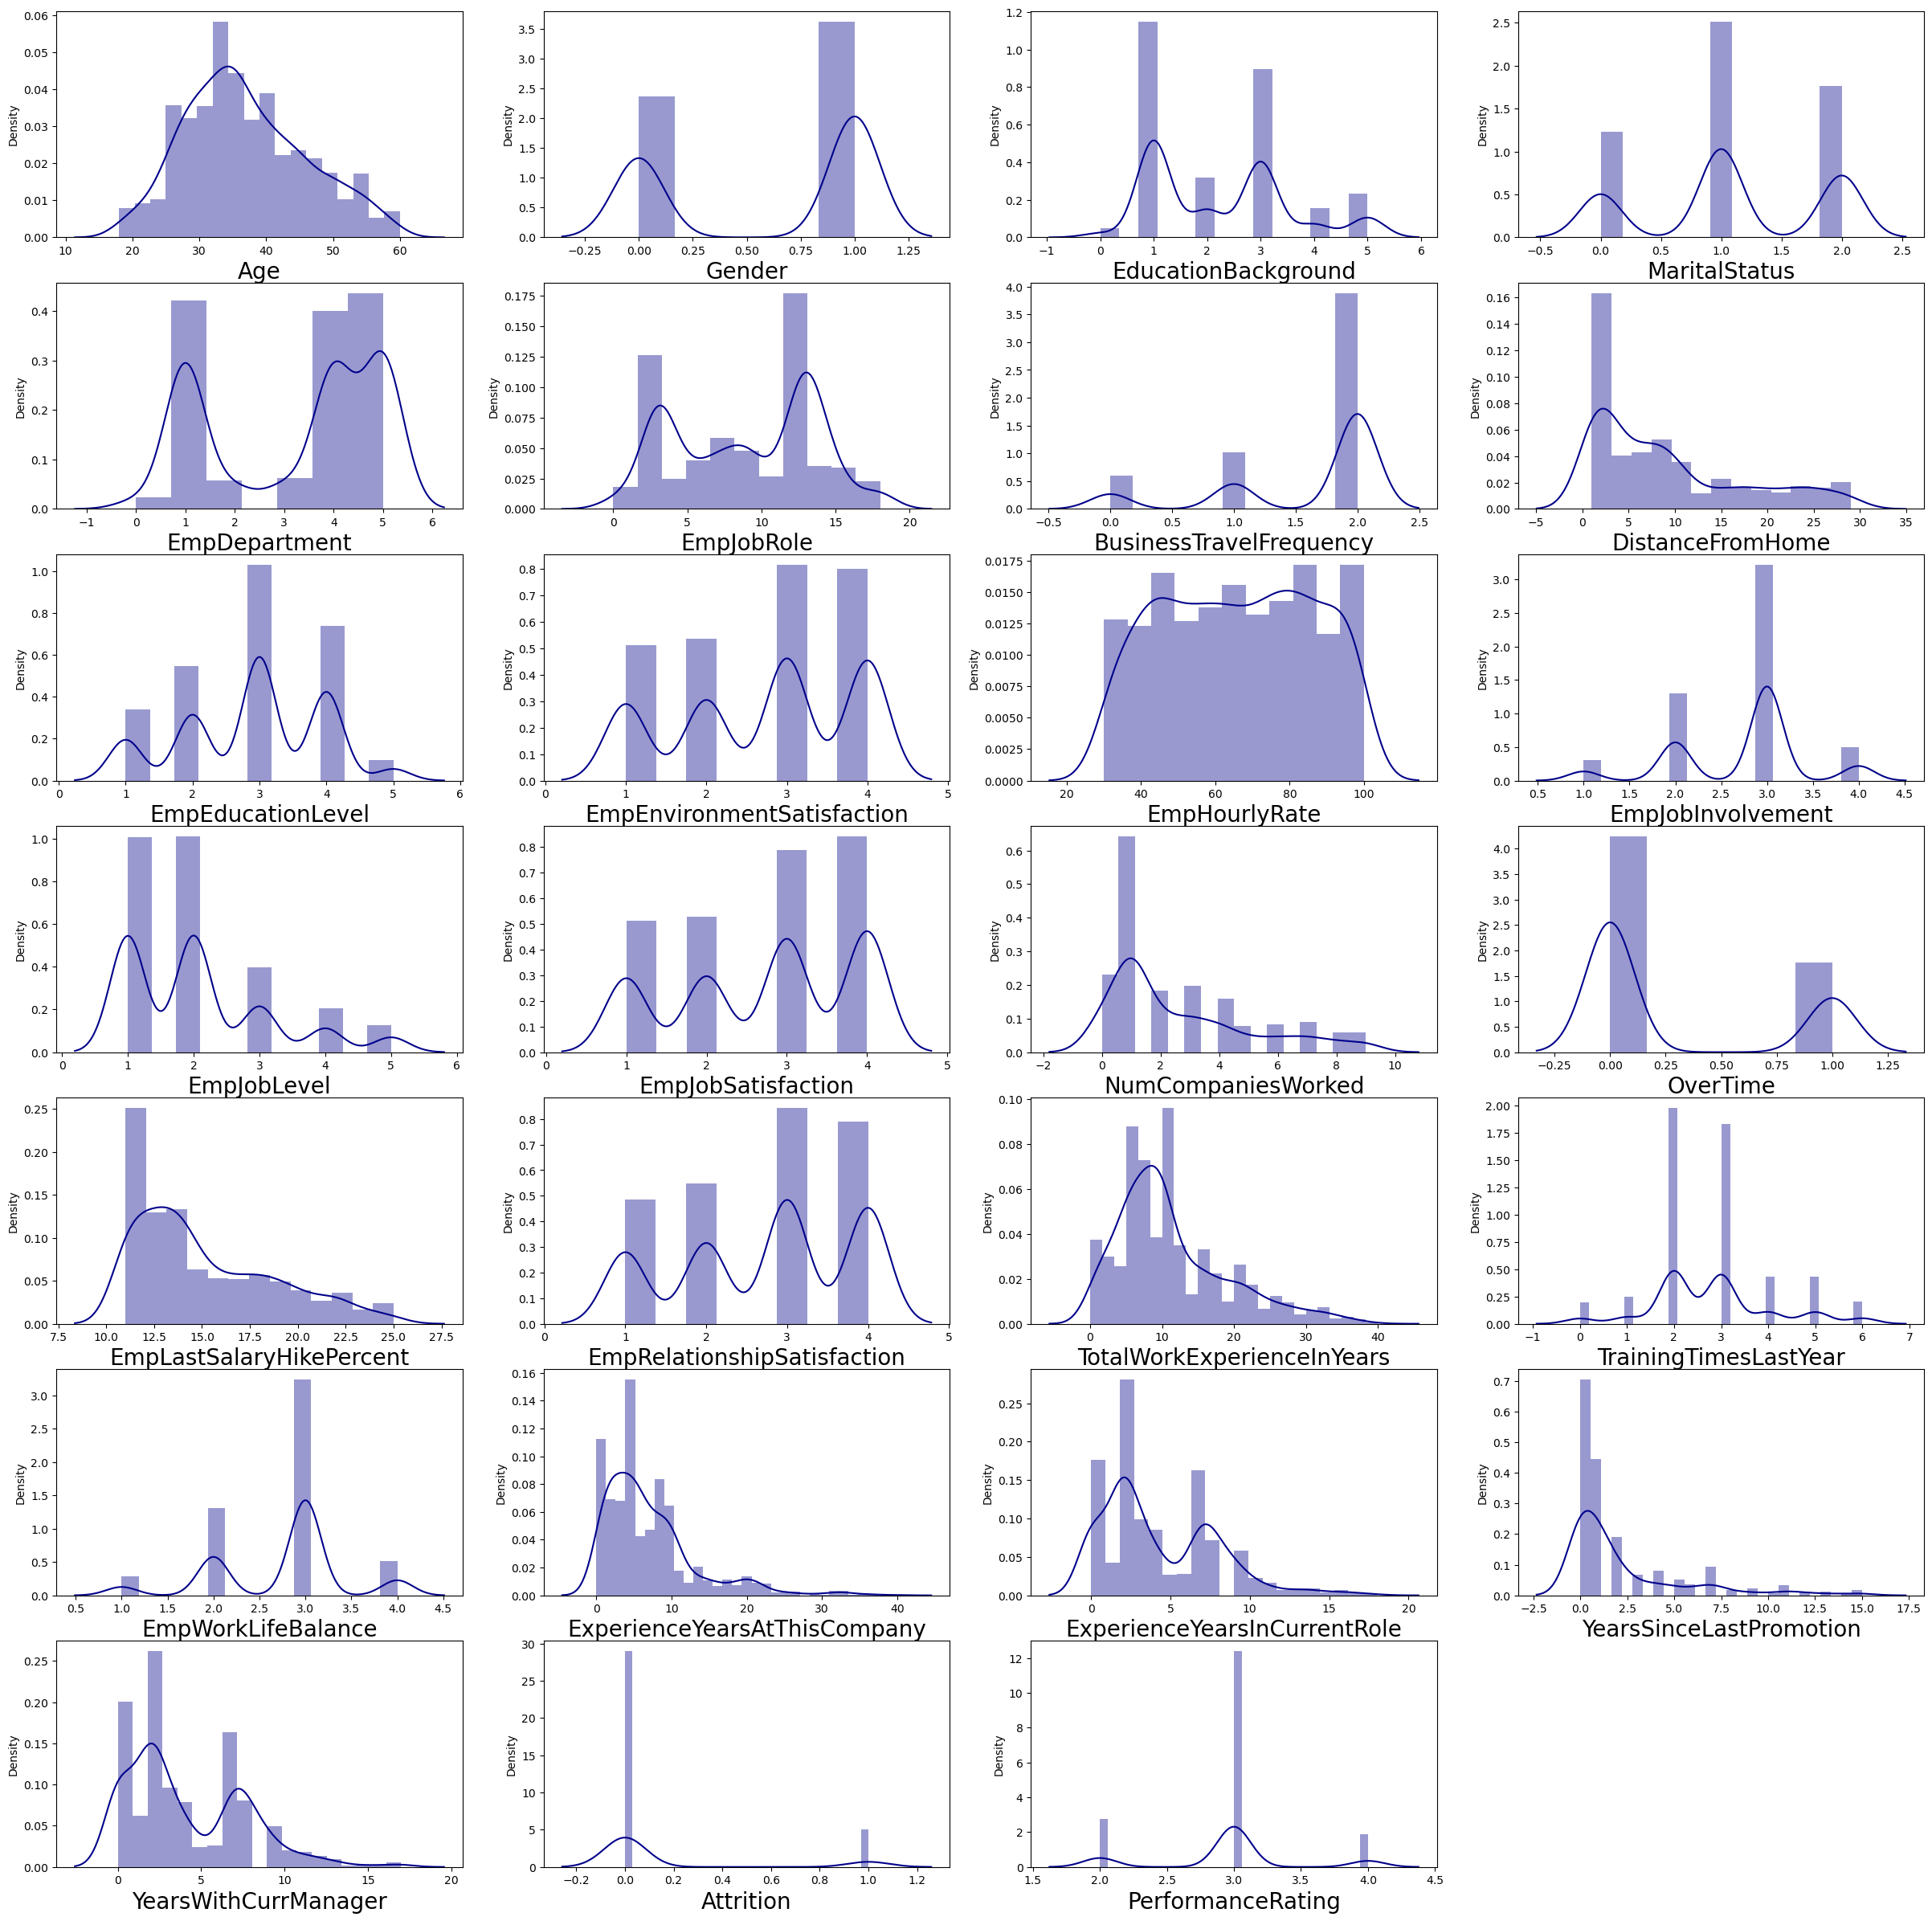

In [51]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in data1:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(x=data1[column],color='darkblue')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

##### We can see many data are Normalized.............................

## 6. Checking For Outlier

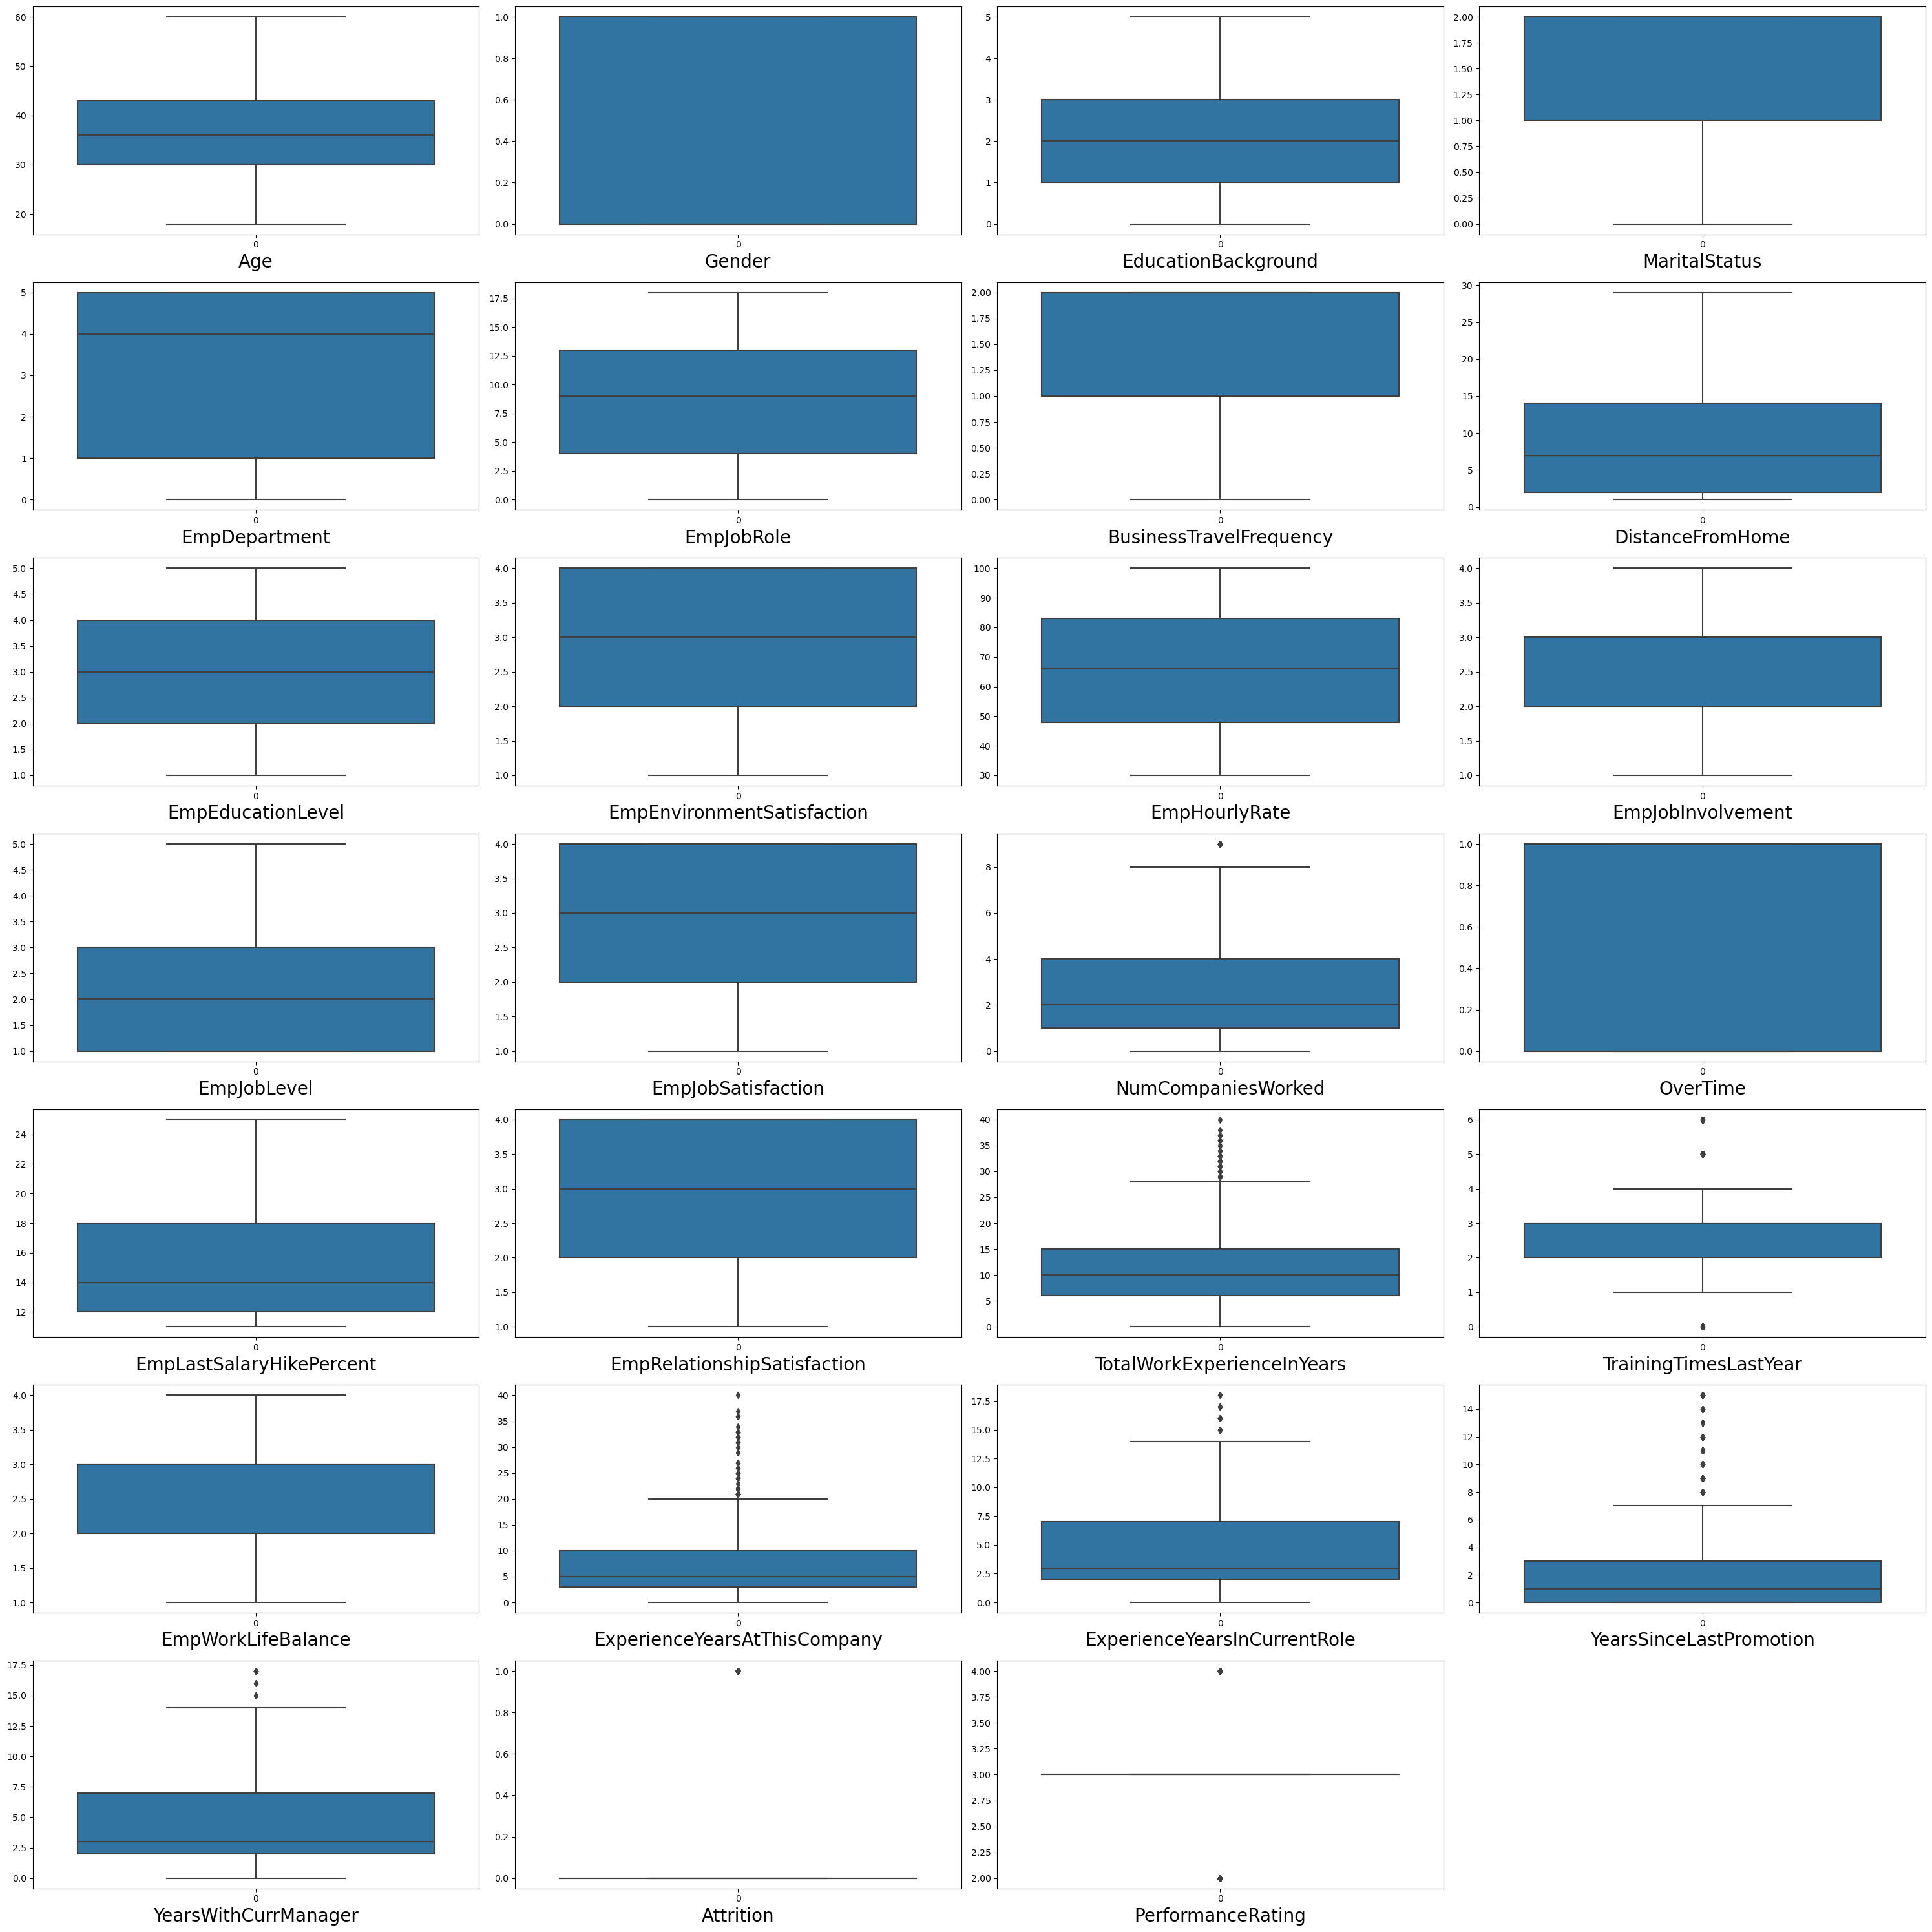

In [52]:
# let's see how data is distributed for every column
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for c in data1:
    if(plotnum<28):
        ax=plt.subplot(7,4,plotnum)
        sns.boxplot(data1[c])
        plt.xlabel(c,fontsize=20)
    plotnum+=1
plt.tight_layout()   

##### From this Boxplot it is clear that, there are alots of outliers in the data provided for most of the variables.Let's handle it.......


### Handling outliers

In [53]:
data1.head(2)

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3

In [54]:
from scipy import stats

In [55]:
IQR = stats.iqr(data1.MaritalStatus, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

1.0

In [56]:
Q1=data1.MaritalStatus.quantile(0.25)#defining 25% of data
Q3=data1.MaritalStatus.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [57]:
min_limit

-0.5

In [58]:
max_limit

3.5

In [59]:
data1.loc[data1['MaritalStatus']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [60]:
data1.loc[data1['MaritalStatus']>max_limit]#checking values which are greater than maximum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

#### NumCompaniesWorked

In [61]:
IQR = stats.iqr(data1.NumCompaniesWorked, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

3.0

In [62]:
Q1=data1.NumCompaniesWorked.quantile(0.25)#defining 25% of data
Q3=data1.NumCompaniesWorked.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [63]:
min_limit

-3.5

In [64]:
max_limit

8.5

In [65]:
data1.loc[data1['NumCompaniesWorked']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [66]:
data1.loc[data1['NumCompaniesWorked']>max_limit]#checking values which are greater than maximum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
8      36       0                    1              1              1   
11     47       0                    3              0              5   
16     39       0                    0              1              3   
38     54       0                    3              0              1   
56     42       0                    1              1              1   
73     44       1                    3              2              1   
105    58       1                    1              0              1   
149    50       1                    3              0              1   
184    32       0                    3              2              4   
211    44       1                    3              1              3   
231    39       1                    1              2              4   
251    40       0                    3              2              4   
321    36       0                    1              2              4   
338    52       1                    1              2              5   
343    40       1                    1              0              4   
409    31       0                    3              2              3   
476    34       1                    1              1              4   
497    36       0                    1              1              2   
553    29       0                    3              1              4   
588    43       1                    5              1              4   
664    42       1                    3              1              4   
740    29       1                    3              1              4   
766    27       1                    3              1              1   
793    36       0                    1              1              1   
804    48       1                    1              2              1   
925    45       1                    3              1              1   
929    38       1                    1              1              1   
939    40       1                    1              1              1   
967    31       1                    3              0              1   
1003   38       1                    1              0              1   
1006   49       0                    1              2              1   
1042   45       1                    4              1              1   
1069   29       1                    1              2              1   
1070   35       1                    1              2              1   
1082   30       1                    5              2              1   
1130   34       0                    0              0              3   
1137   35       1                    2              1              5   
1143   31       1                    1              0              5   
1199   24       0                    1              2              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
8              3                        0                 8   
11            13                        1                 3   
16             6                        2                 3   
38             3                        2                19   
56             3                        2                 1   
73             3                        2                 4   
105            3                        1                 2   
149           15                        2                 1   
184           16                        0                29   
211            6                        2                 1   
231            7                        0                 9   
251           11                        1                 9   
321           10                        2                 2   
338           13                        2                 5   
343           12                        0                16   
409            6                        2                 8   
476            9                        2             

In [67]:
#imputing outlier with with median
data1.loc[data1['NumCompaniesWorked']>max_limit,'NumCompaniesWorked']=np.median(data1.NumCompaniesWorked)

In [68]:
data1.loc[data1['NumCompaniesWorked']>max_limit]#checking values which are greater than maximum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

#### TotalWorkExperienceInYears

In [69]:
IQR = stats.iqr(data1.TotalWorkExperienceInYears, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

9.0

In [70]:
Q1=data1.TotalWorkExperienceInYears.quantile(0.25)#defining 25% of data
Q3=data1.TotalWorkExperienceInYears.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [71]:
min_limit

-7.5

In [72]:
max_limit

28.5

In [73]:
data1.loc[data1['TotalWorkExperienceInYears']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [74]:
data1.loc[data1['TotalWorkExperienceInYears']>max_limit] #checking values which are less than minimum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
17     56       1                    3              1              1   
25     52       1                    2              1              5   
48     50       1                    3              1              1   
72     51       0                    2              1              5   
77     53       0                    2              1              5   
96     53       0                    1              2              1   
100    50       1                    1              0              1   
149    50       1                    3              0              1   
173    59       0                    1              2              4   
178    52       0                    2              1              5   
192    50       1                    3              1              4   
199    55       1                    3              2              4   
277    50       0                    3              1              4   
292    54       0                    1              0              4   
295    54       1                    1              1              4   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
342    56       1                    1              2              3   
347    51       1                    1              0              3   
351    58       0                    3              1              4   
356    51       0                    5              2              4   
361    56       1                    1              1              4   
387    54       0                    3              2              4   
388    58       0                    3              1              4   
424    49       1                    1              0              4   
450    50       1                    3              2              4   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
525    49       0                    1              1              2   
528    54       0                    3              1              2   
589    55       1                    3              1              4   
615    58       1                    3              0              5   
642    48       1                    1              1              4   
678    58       0                    1              1              5   
703    55       1                    0              1              3   
777    53       0                    1              1              5   
816    50       0                    3              0              1   
845    58       1                    3              2              5   
867    58       0                    3              1              1   
921    52       1                    1              1              1   
958    50       0                    3              0              5   
962    52       1                    1              2              5   
989    55       1                    3              2              1   
1077   55       0                    1              2              1   
1101   52       0                    1              1              0   
1104   60       0                    1              1              1   
1116   57       1                    2              0              5   
1135   55       0                    1              2              5   
1156   49       1                    1              0              1   
1160   50       1                    3              1              3   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
17             3                        2                 9   
25             8                        2                 3   
48             3                        2                 2   
72       

In [75]:
#imputing outlier with with median
data1.loc[data1['TotalWorkExperienceInYears']>max_limit,'TotalWorkExperienceInYears']=np.median(data1.NumCompaniesWorked)

#### TrainingTimesLastYear

In [76]:
IQR = stats.iqr(data1.TrainingTimesLastYear, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

1.0

In [77]:
Q1=data1.TrainingTimesLastYear.quantile(0.25)#defining 25% of data
Q3=data1.TrainingTimesLastYear.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [78]:
min_limit

0.5

In [79]:
max_limit

4.5

In [80]:
data1.loc[data1['TrainingTimesLastYear']<min_limit] #checking values which are less than minimum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
55     35       0                    1              2              1   
96     53       0                    1              2              1   
104    44       1                    1              1              1   
144    31       1                    3              2              1   
153    47       0                    1              2              5   
156    38       1                    3              1              4   
165    48       1                    1              2              4   
215    26       1                    3              0              4   
232    36       1                    1              2              4   
242    18       1                    3              2              4   
247    27       1                    1              1              4   
333    36       0                    5              1              4   
343    40       1                    1              0              4   
344    34       1                    1              0              4   
351    58       0                    3              1              4   
358    35       0                    3              1              4   
361    56       1                    1              1              4   
363    40       0                    3              0              4   
368    28       1                    1              1              5   
411    34       0                    5              1              3   
414    49       1                    5              1              4   
482    29       1                    1              0              2   
487    43       1                    5              0              2   
516    27       0                    3              1              2   
517    27       1                    3              2              2   
575    30       0                    0              0              3   
615    58       1                    3              0              5   
667    31       0                    3              0              4   
680    38       1                    1              0              4   
703    55       1                    0              1              3   
762    27       1                    1              1              4   
765    41       0                    1              2              5   
798    27       1                    1              2              5   
822    36       1                    3              1              1   
842    32       1                    3              2              5   
876    36       1                    3              0              1   
932    49       1                    1              0              1   
979    51       1                    1              1              1   
981    38       1                    1              1              5   
1002   44       1                    1              0              1   
1008   26       1                    2              2              5   
1034   32       0                    3              2              1   
1040   27       1                    2              1              5   
1068   21       0                    1              2              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
55            15                        2                 1   
96             3                        2                23   
104            3                        2                 9   
144            3                        0                 9   
153           13                        2                 4   
156           16                        1                10   
165            5                        2                 6   
215            9                        2                21   
232           10                        0                18   
242            7                        0                 8   
247           12                        2                 6   
333      

In [81]:
data1.loc[data1['TrainingTimesLastYear']>max_limit] #checking values which are less than minimum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
10     44       1                    3              2              1   
13     29       1                    1              2              5   
27     25       0                    3              2              5   
31     34       1                    4              2              5   
59     40       1                    3              2              1   
...   ...     ...                  ...            ...            ...   
1158   26       1                    2              1              5   
1166   27       0                    3              0              1   
1184   29       0                    3              1              5   
1188   20       1                    3              2              1   
1193   29       1                    1              0              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
10             3                        0                24   
13            14                        2                10   
27            13                        2                26   
31            13                        2                 2   
59             3                        1                16   
...          ...                      ...               ...   
1158          13                        2                28   
1166           3                        2                 6   
1184          13                        2                 3   
1188          15                        2                10   
1193           3                        1                 1   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
10                    3                           1             49   
13                    3                           3             99   
27                    1                           3             32   
31                    3                           4             60   
59                    4                           1             51   
...                 ...                         ...            ...   
1158                  2                           1             66   
1166                  4                           1             66   
1184                  2                           2             62   
1188                  1                           4             32   
1193                  4                           2             76   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
10                    1            1                   3                   2   
13                    3            1                   3                   1   
27                    3            2                   4                   1   
31                    3            2                   4                   1   
59                    2            2                   3                   6   
...                 ...          ...                 ...                 ...   
1158                  3            2                   2                   1   
1166                  2            1                   3                   0   
1184                  3            2                   3                   1   
1188                  3            1                   3                   1   
1193                  1            1                   4                   1   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
10           0                        14                            3   
13           0                        11                            3   
27           0                        23                            2   
31           0                        22                            3   
59           0                        14                            4   
...        ...                       ...                          ...   
1158         0                        20                            4  

In [82]:
#imputing outlier with with median
data1.loc[data1['TrainingTimesLastYear']<min_limit,'TrainingTimesLastYear']=np.median(data1.TrainingTimesLastYear)

In [83]:
#imputing outlier with with median
data1.loc[data1['TrainingTimesLastYear']>max_limit,'TrainingTimesLastYear']=np.median(data1.TrainingTimesLastYear)

#### ExperienceYearsAtThisCompany

In [84]:
IQR = stats.iqr(data1.ExperienceYearsAtThisCompany, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

7.0

In [85]:
Q1=data1.ExperienceYearsAtThisCompany.quantile(0.25)#defining 25% of data
Q3=data1.ExperienceYearsAtThisCompany.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [86]:
min_limit

-7.5

In [87]:
max_limit

20.5

In [88]:
data1.loc[data1['ExperienceYearsAtThisCompany']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [89]:
data1.loc[data1['ExperienceYearsAtThisCompany']>max_limit] #checking values which are less than minimum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
25     52       1                    2              1              5   
52     47       0                    4              1              1   
100    50       1                    1              0              1   
168    39       0                    1              1              4   
175    41       0                    1              0              4   
178    52       0                    2              1              5   
181    39       0                    3              2              4   
216    42       1                    3              1              4   
252    42       1                    1              2              5   
272    46       0                    2              1              5   
304    44       1                    2              1              5   
307    45       0                    2              2              5   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
316    44       1                    1              0              4   
320    43       0                    2              2              5   
347    51       1                    1              0              3   
450    50       1                    3              2              4   
459    40       1                    3              2              3   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
492    44       0                    3              0              2   
555    45       1                    1              1              4   
557    45       0                    5              2              4   
571    40       1                    3              2              5   
613    41       0                    2              0              5   
617    47       0                    1              0              4   
642    48       1                    1              1              4   
658    48       0                    3              0              4   
777    53       0                    1              1              5   
785    44       0                    3              1              1   
816    50       0                    3              0              1   
817    59       0                    1              2              5   
838    40       1                    1              1              1   
845    58       1                    3              2              5   
862    43       1                    1              1              5   
867    58       0                    3              1              1   
911    46       0                    2              0              5   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
962    52       1                    1              2              5   
978    40       1                    3              0              0   
989    55       1                    3              2              1   
1015   41       1                    1              2              5   
1024   45       1                    1              0              1   
1027   39       1                    3              1              1   
1036   39       1                    3              1              1   
1086   43       1                    1              0              1   
1094   39       1                    1              0              1   
1104   60       0                    1              1              1   
1117   50       1                    1              1              1   
1156   49       1                    1        

In [90]:
#imputing outlier with with median
data1.loc[data1['ExperienceYearsAtThisCompany']>max_limit,'ExperienceYearsAtThisCompany']=np.median(data1.ExperienceYearsAtThisCompany)

#### ExperienceYearsInCurrentRole

In [91]:
IQR = stats.iqr(data1.ExperienceYearsInCurrentRole, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

5.0

In [92]:
Q1=data1.ExperienceYearsInCurrentRole.quantile(0.25)#defining 25% of data
Q3=data1.ExperienceYearsInCurrentRole.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [93]:
min_limit

-5.5

In [94]:
max_limit

14.5

In [95]:
data1.loc[data1['ExperienceYearsInCurrentRole']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [96]:
data1.loc[data1['ExperienceYearsInCurrentRole']>max_limit] #checking values which are less than minimum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
151    41       1                    3              0              1   
175    41       0                    1              0              4   
272    46       0                    2              1              5   
361    56       1                    1              1              4   
501    35       1                    1              1              2   
555    45       1                    1              1              4   
639    46       0                    5              0              5   
658    48       0                    3              0              4   
730    38       0                    3              1              4   
817    59       0                    1              2              5   
864    51       1                    1              2              1   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
999    42       1                    1              1              5   
1109   40       0                    1              1              5   
1152   41       0                    1              1              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
151            3                        1                 9   
175           11                        0                 7   
272            8                        2                 2   
361            9                        2                23   
501            4                        2                18   
555            9                        0                 1   
639           13                        2                 3   
658            8                        1                22   
730           11                        2                10   
817           13                        2                25   
864            3                        2                 6   
921            3                        2                 1   
956            3                        2                 4   
999           13                        2                 1   
1109           8                        2                 2   
1152           8                        2                 2   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
151                   3                           1             64   
175                   1                           2             55   
272                   3                           3             69   
361                   3                           4             68   
501                   5                           2             48   
555                   1                           3             74   
639                   3                           1             45   
658                   3                           4             58   
730                   3                           2             99   
817                   3                           1             99   
864                   3                           1             51   
921                   4                           3             65   
956                   2                           3             58   
999                   1                           2             99   
1109                  4                           3             79   
1152                  5                           2             91   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
151                   3            5                   3                   2   
175                   1            5                   3                   1   
272                   3            4                   1                   8   
361                   3            4                   2                   4   
501                   4            2                   1                   1   
555                   2            3  

In [97]:
#imputing outlier with with median
data1.loc[data1['ExperienceYearsInCurrentRole']>max_limit,'ExperienceYearsInCurrentRole']=np.median(data1.ExperienceYearsInCurrentRole)

In [98]:
data1.loc[data1['ExperienceYearsInCurrentRole']>max_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

#### YearsSinceLastPromotion

In [99]:
IQR = stats.iqr(data1.YearsSinceLastPromotion, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

3.0

In [100]:
Q1=data1.YearsSinceLastPromotion.quantile(0.25)#defining 25% of data
Q3=data1.YearsSinceLastPromotion.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [101]:
min_limit

-4.5

In [102]:
max_limit

7.5

In [103]:
data1.loc[data1['YearsSinceLastPromotion']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [104]:
data1.loc[data1['YearsSinceLastPromotion']>max_limit] #checking values which are less than minimum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
100    50       1                    1              0              1   
130    31       0                    3              1              1   
132    37       1                    1              1              5   
...   ...     ...                  ...            ...            ...   
1152   41       0                    1              1              5   
1160   50       1                    3              1              3   
1181   34       1                    1              1              1   
1185   35       1                    1              2              1   
1189   33       1                    1              2              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3              8                        2                10   
11            13                        1                 3   
100            3                        0                 2   
130            3                        2                12   
132           13                        2                 1   
...          ...                      ...               ...   
1152           8                        2                 2   
1160           8                        1                 3   
1181          15                        2                 1   
1185          15                        2                 6   
1189          15                        1                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
3                     4                           2             73   
11                    3                           4             49   
100                   4                           1             98   
130                   3                           4             41   
132                   4                           1             46   
...                 ...                         ...            ...   
1152                  5                           2             91   
1160                  3                           1             99   
1181                  5                           2             42   
1185                  4                           2             82   
1189                  3                           1             70   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
3                     2            5                   4                   3   
11                    3            4                   3                   2   
100                   3            4                   1                   1   
130                   3            2                   4                   0   
132                   2            3                   3                   5   
...                 ...          ...                 ...                 ...   
1152                  3            4                   1                   7   
1160                  3            5                   2                   1   
1181                  3            1                   4                   1   
1185                  1            2                   4                   1   
1189                  3            1                   1                   1   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
3            0                        15                            2   
11           1                        12                            4   
100          0                        11                            4   
130          1                        11                            3   
132          0                        11                            3   
...        ...                       ...                          ...   
1152         0                        16                            2  

In [105]:
#imputing outlier with with median
data1.loc[data1['YearsSinceLastPromotion']>max_limit,'YearsSinceLastPromotion']=np.median(data1.YearsSinceLastPromotion)

In [106]:
data1.loc[data1['YearsSinceLastPromotion']>max_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

#### YearsWithCurrManager

In [107]:
IQR = stats.iqr(data1.YearsWithCurrManager, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

5.0

In [108]:
Q1=data1.YearsWithCurrManager.quantile(0.25)#defining 25% of data
Q3=data1.YearsWithCurrManager.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [109]:
min_limit

-5.5

In [110]:
max_limit

14.5

In [111]:
data1.loc[data1['YearsWithCurrManager']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [112]:
data1.loc[data1['YearsWithCurrManager']>max_limit] #checking values which are less than minimum limit

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
25     52       1                    2              1              5   
72     51       0                    2              1              5   
126    41       1                    3              2              1   
283    44       1                    4              2              4   
320    43       0                    2              2              5   
655    40       1                    1              0              4   
785    44       0                    3              1              1   
864    51       1                    1              2              1   
888    45       1                    1              0              1   
956    42       1                    5              1              1   
1083   37       0                    1              0              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
25             8                        2                 3   
72             8                        2                26   
126            3                        2                 6   
283           12                        2                29   
320           13                        2                 4   
655            9                        2                 1   
785            3                        2                 7   
864            3                        2                 6   
888            3                        2                 9   
956            3                        2                 4   
1083           2                        2                14   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
25                    4                           3             31   
72                    4                           1             66   
126                   3                           4             59   
283                   4                           4             32   
320                   4                           4             56   
655                   4                           1             98   
785                   4                           1             42   
864                   3                           1             51   
888                   3                           2             60   
956                   2                           3             58   
1083                  3                           4             95   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
25                    2            4                   1                   1   
72                    3            4                   3                   2   
126                   3            1                   1                   2   
283                   3            2                   4                   1   
320                   2            3                   4                   3   
655                   3            4                   1                   2   
785                   2            3                   4                   3   
864                   3            5                   3                   7   
888                   3            2                   2                   8   
956                   3            5                   4                   1   
1083                  3            1                   1                   1   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
25           0                        11                            1   
72           0                        14                            3   
126          1                        13                            3   
283          0                        25                            2   
320          0                        14                            4   
655          0                        11                            1   
785          0                        14                            4  

In [113]:
#imputing outlier with with median
data1.loc[data1['YearsWithCurrManager']>max_limit,'YearsWithCurrManager']=np.median(data1.YearsWithCurrManager)

#### Attrition

In [114]:
data1.Attrition.value_counts()

0    1022
1     178
Name: Attrition, dtype: int64

## 7. Checking the duplicate rows

In [115]:
data1.drop_duplicates()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       1                    2              2              5   
1      47       1                    2              2              5   
2      40       1                    1              1              5   
3      41       1                    0              0              3   
4      60       1                    2              2              5   
...   ...     ...                  ...            ...            ...   
1195   27       0                    3              0              5   
1196   37       1                    1              2              1   
1197   50       1                    3              1              1   
1198   34       0                    3              2              0   
1199   24       0                    1              2              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             13                        2                10   
1             13                        2                14   
2             13                        1                 5   
3              8                        2                10   
4             13                        2                16   
...          ...                      ...               ...   
1195          13                        1                 3   
1196          15                        2                10   
1197          15                        2                28   
1198           1                        2                 9   
1199          13                        2                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                     3                           4             55   
1                     4                           4             42   
2                     4                           4             48   
3                     4                           2             73   
4                     4                           1             84   
...                 ...                         ...            ...   
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                     3            2                   4                   1   
1                     3            2                   1                   2   
2                     2            3                   1                   5   
3                     2            5                   4                   3   
4                     3            2                   1                   8   
...                 ...          ...                 ...                 ...   
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   2   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            0                        12                            4   
1            0                        12                            4   
2            1                        21                            3   
3            0                        15                            2   
4            0                        14                            4   
...        ...                       ...                          ...   
1195         1                        20                            2  

In [116]:
data1.duplicated().sum()  

0

In [117]:
data1.drop_duplicates(inplace = True)

In [118]:
data1.duplicated().sum()

0

# 8.Scaling the Contineous variable

In [119]:
data1.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                        1   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

In [120]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data1[['Age','Gender','EducationBackground','MaritalStatus','EmpDepartment',
         'EmpJobRole','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel',
         'EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel'
         ,'EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent',
         'EmpRelationshipSatisfaction','TotalWorkExperienceInYears','TrainingTimesLastYear',
         'EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole',
         'YearsSinceLastPromotion','YearsWithCurrManager','Attrition']]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       1                    2              2              5   
1      47       1                    2              2              5   
2      40       1                    1              1              5   
3      41       1                    0              0              3   
4      60       1                    2              2              5   
...   ...     ...                  ...            ...            ...   
1195   27       0                    3              0              5   
1196   37       1                    1              2              1   
1197   50       1                    3              1              1   
1198   34       0                    3              2              0   
1199   24       0                    1              2              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             13                        2                10   
1             13                        2                14   
2             13                        1                 5   
3              8                        2                10   
4             13                        2                16   
...          ...                      ...               ...   
1195          13                        1                 3   
1196          15                        2                10   
1197          15                        2                28   
1198           1                        2                 9   
1199          13                        2                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                     3                           4             55   
1                     4                           4             42   
2                     4                           4             48   
3                     4                           2             73   
4                     4                           1             84   
...                 ...                         ...            ...   
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                     3            2                   4                   1   
1                     3            2                   1                   2   
2                     2            3                   1                   5   
3                     2            5                   4                   3   
4                     3            2                   1                   8   
...                 ...          ...                 ...                 ...   
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   2   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            0                        12                            4   
1            0                        12                            4   
2            1                        21                            3   
3            0                        15                            2   
4            0                        14                            4   
...        ...                       ...                          ...   
1195         1                        20                            2  

# Feature Selection

In [121]:
data1.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                        1   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

<Axes: >

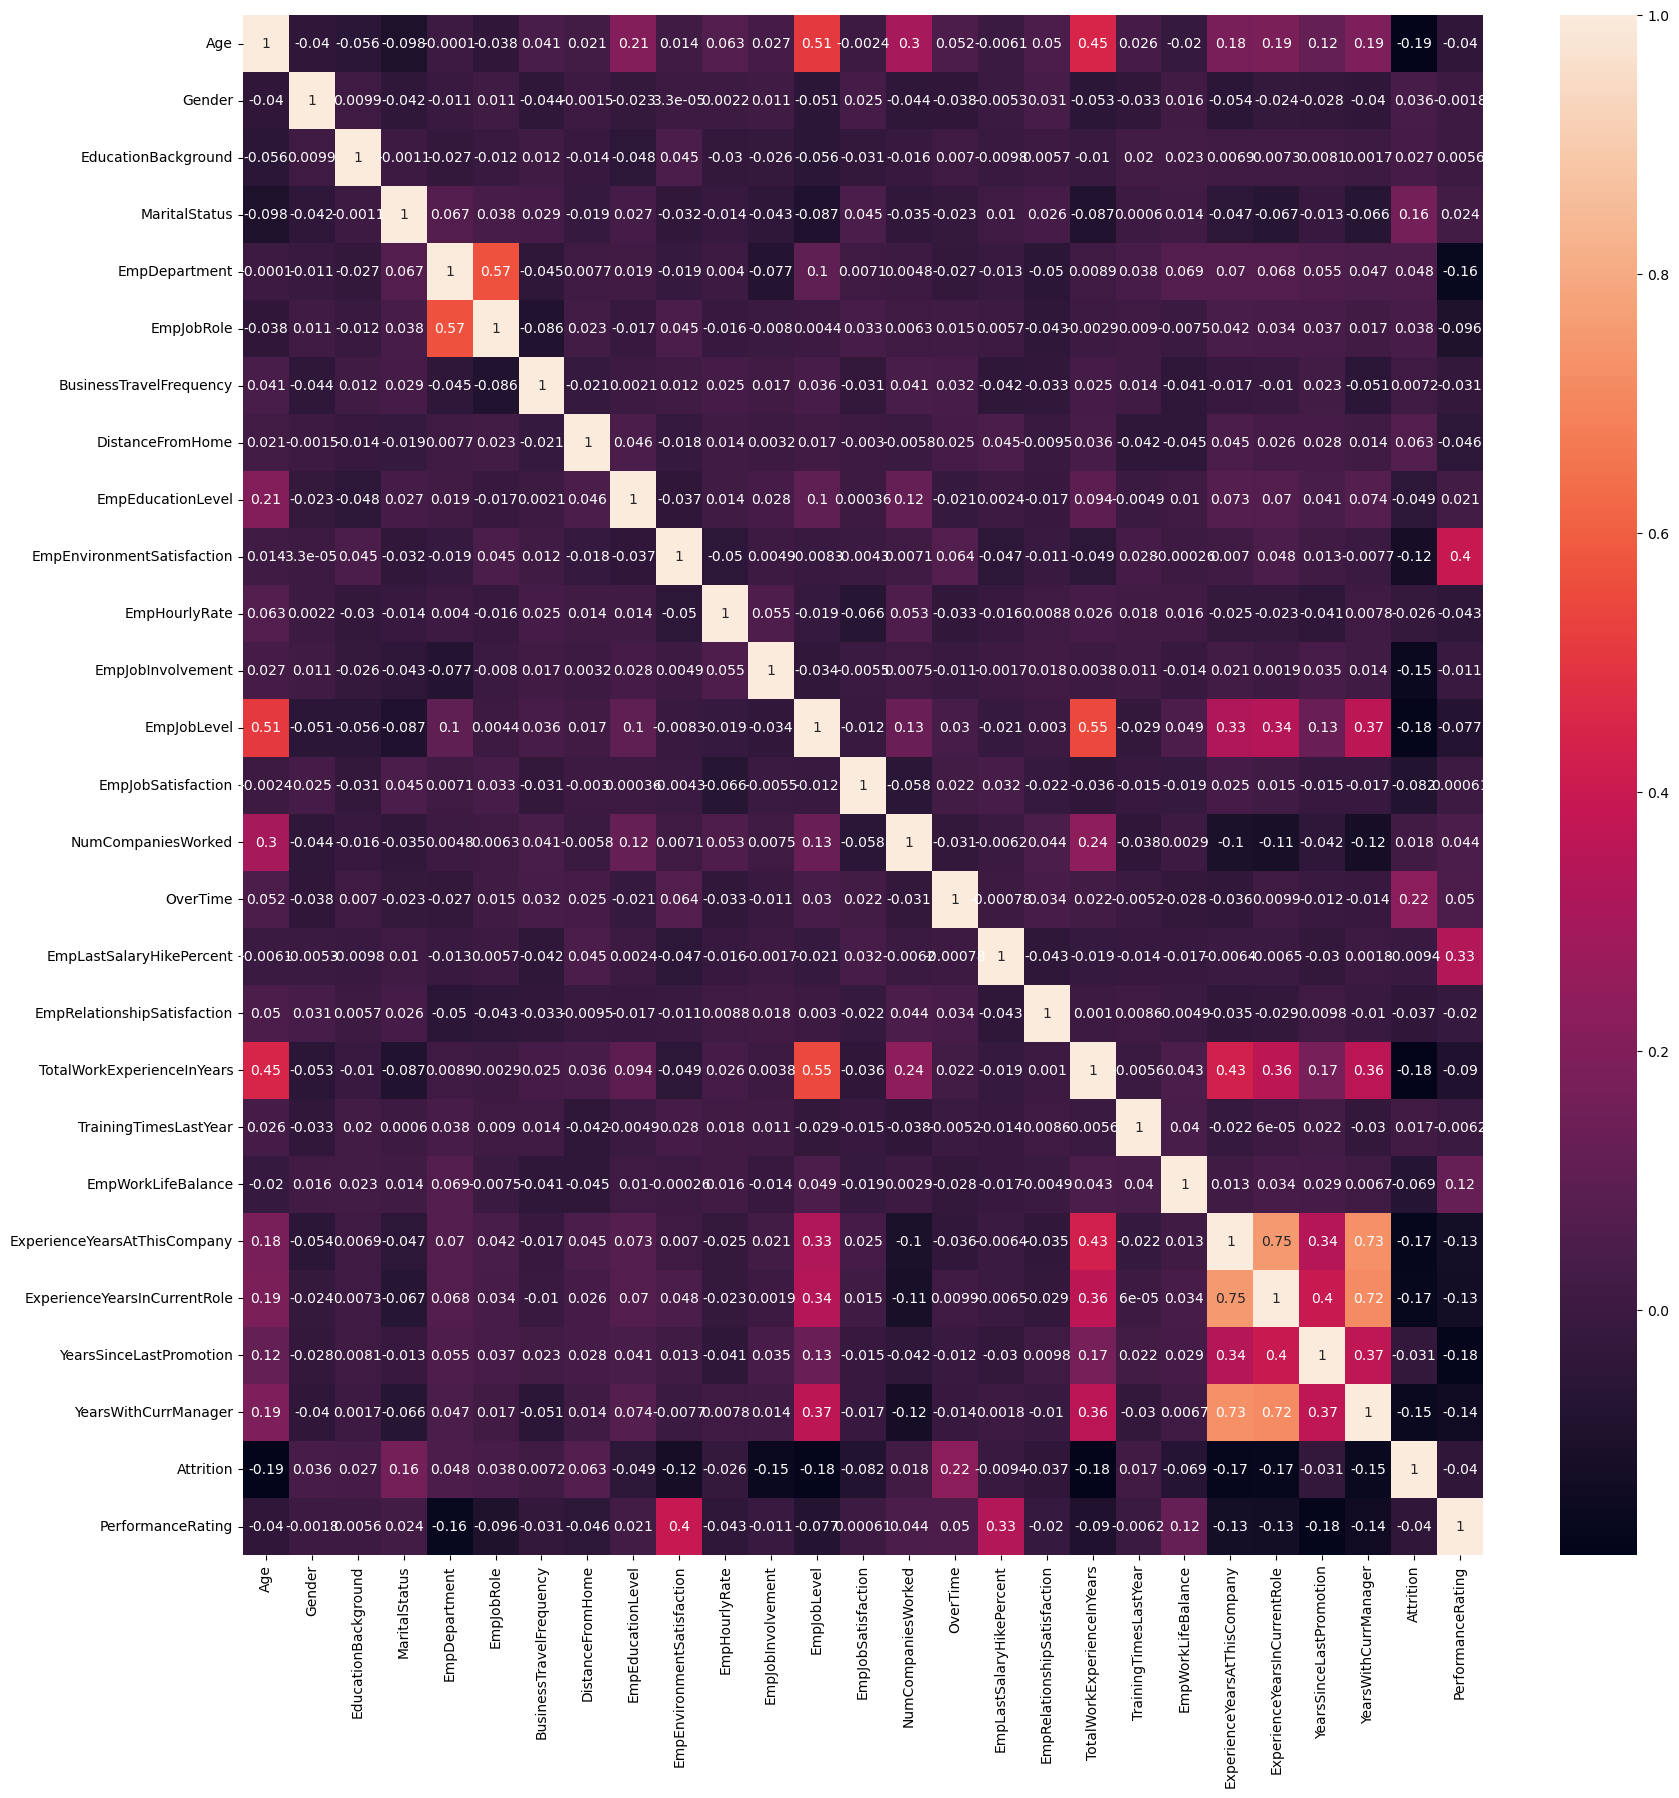

In [122]:
plt.figure(figsize=(20,20))#canvas size
sns.heatmap(data1.corr(),annot=True)

 ###### Using Heatmap and Pearson's Correlation __
Seaborn library's Heatmap by default uses pearson's correlation i.e. standard correlation to calculate the correlation of each numerical feature with another. The following are the inferences gathered from our analysis of the same
The better the employee's worklife balance the better he/she performs
Trainings should be kept at a moderate amount as a very high amount of training is resulting in reducing employee performance
The Employee relationship should be kept in control and not very low or very high as that affects the performance rating of the employee
The higher the environment satisfaction the higher is the employee performance
Employees with salary hike above 20 % tend to have a drastic increase in their performance

##### There is no relationship among the Employee data .........

# Model Creation

In [123]:
data1.head(2)

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3

In [124]:
## defining X and y
X=data1[['Age','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']]
y=data1.PerformanceRating

In [125]:
data1.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [126]:
X

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       1                    2              2              5   
1      47       1                    2              2              5   
2      40       1                    1              1              5   
3      41       1                    0              0              3   
4      60       1                    2              2              5   
...   ...     ...                  ...            ...            ...   
1195   27       0                    3              0              5   
1196   37       1                    1              2              1   
1197   50       1                    3              1              1   
1198   34       0                    3              2              0   
1199   24       0                    1              2              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             13                        2                10   
1             13                        2                14   
2             13                        1                 5   
3              8                        2                10   
4             13                        2                16   
...          ...                      ...               ...   
1195          13                        1                 3   
1196          15                        2                10   
1197          15                        2                28   
1198           1                        2                 9   
1199          13                        2                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                     3                           4             55   
1                     4                           4             42   
2                     4                           4             48   
3                     4                           2             73   
4                     4                           1             84   
...                 ...                         ...            ...   
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                     3            2                   4                   1   
1                     3            2                   1                   2   
2                     2            3                   1                   5   
3                     2            5                   4                   3   
4                     3            2                   1                   8   
...                 ...          ...                 ...                 ...   
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   2   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            0                        12                            4   
1            0                        12                            4   
2            1                        21                            3   
3            0                        15                            2   
4            0                        14                            4   
...        ...                       ...                          ...   
1195         1                        20                            2  

In [127]:
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

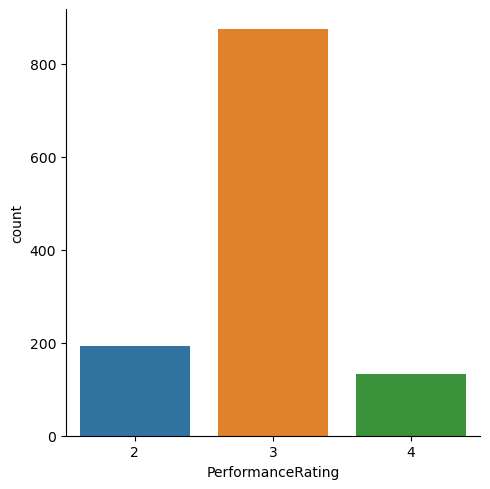

In [128]:
sns.catplot(x='PerformanceRating',data=data1,kind='count')

In [129]:
data1.PerformanceRating.value_counts()   # that data inbalanced ,where we can see .....

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

# Balancing the data

In [130]:
# Install imblearn package - pip install imblearn
!pip install --user imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [131]:
X_smote, y_smote = smote.fit_resample(X,y)

In [132]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({3: 874, 2: 194, 4: 132})
SMOTE Classes Counter({3: 874, 4: 874, 2: 874})


In [133]:
# Importing modules from sklearn library.................
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Evaluating the model..........................

from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1835, 26)
(1835,)
(787, 26)
(787,)


In [135]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.8132147395171537
RandomForsetClassifier
0.96569250317662
DecisionTreeClassifier
0.9097839898348158
KNeighborsClassifier
0.7852604828462516


##### The machine learning model has been fitted and predicted with the accuracy score. The goal of this project is nothing but the results from the analysis and machine learning model.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'RandomForsetClassifier'),
  Text(2, 0, 'DecisionTreeClassifier'),
  Text(3, 0, 'KNeighborsClassifier')])

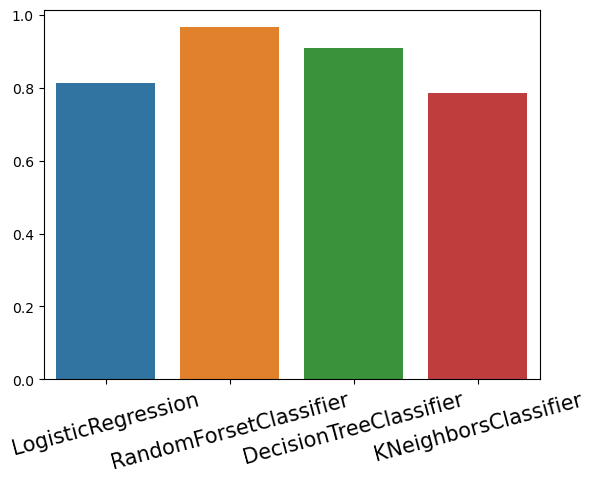

In [136]:
sns.barplot(x= ['LogisticRegression','RandomForsetClassifier','DecisionTreeClassifier','KNeighborsClassifier'],y=accuracy_scores)
plt.xticks(rotation = 15,fontsize = 15)

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.70      0.94      0.80       267
           3       0.89      0.47      0.61       275
           4       0.84      0.97      0.90       245

    accuracy                           0.79       787
   macro avg       0.81      0.79      0.77       787
weighted avg       0.81      0.79      0.77       787



# XgBoost

In [138]:
## Installing XGB library
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [139]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835 entries, 176 to 863
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1835 non-null   int64
 1   Gender                        1835 non-null   int32
 2   EducationBackground           1835 non-null   int32
 3   MaritalStatus                 1835 non-null   int32
 4   EmpDepartment                 1835 non-null   int32
 5   EmpJobRole                    1835 non-null   int32
 6   BusinessTravelFrequency       1835 non-null   int32
 7   DistanceFromHome              1835 non-null   int64
 8   EmpEducationLevel             1835 non-null   int64
 9   EmpEnvironmentSatisfaction    1835 non-null   int64
 10  EmpHourlyRate                 1835 non-null   int64
 11  EmpJobInvolvement             1835 non-null   int64
 12  EmpJobLevel                   1835 non-null   int64
 13  EmpJobSatisfaction            18

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [141]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price
score = xgb_r.score(X_test, y_test)
score

0.0

In [142]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X = X_train,y =  y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accur_score = round(accuracy_score(y_test, y_pred)*100,2)
print("The Accuracy score is:",accur_score)


[[265   2   0]
 [  8 256  11]
 [  1   5 239]]
The Accuracy score is: 96.57


The trained model is created using the machine learning algorithm as follows with the accuracy score.......

##### Random Forest classifier: 96% accuracy 
##### XGBoost (eXtreme Gradient Boosting) :95.93% accuracy


The overall employee performance can be achieved by employee environment satisfaction. The company needs to focus more on the employee environment.

##### Results
Random Forest gives **96%** and XgBoosts gives **95.93%** accuracy. The features that are positively correlated are Environment Satisfaction, Last Salary Hike Percent & Worklife Balance. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in Current Role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.
###### The top 3 features effecting employee performances are:-------

Employee Environment Satisfaction

Employee Last Salary Hike Percent 

Years since last promotion 

##### The important features that are positively correlated are Environment Satisfaction, Last Salary Hike Percent & Worklife Balance. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in current role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.
###### We can conclude that the company should provide a better environment as it increases the performance drastically. The company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.

# Recommandations to improve employee performance


1.A better work enviornment would give a better employee environment satisfaction and as seen in all analysis this being the most important factor would achieve significant improvements in employee performance.

2.The company can come up with a review system to review employee salaries and promotions at a better rate which would definitely boost employee moral, ethics and integrity thereby improving the employee performance

3.A better work life balance would result in some increase in employee performance as well as seen in department wise analysis

4.A role revision at a rate as frequent as every couple of years would definitly boost employee performance

5.Speaking gender wise Human resources can have a performance boost by hiring more female employees as female employees in HR has a considerably better performance.

6.Restructure the work environment, role and salary revision prioritizing finance department as it has more low performing employees then any other department

# CONCLUSION

###### Employee of higher age have low performance rating which states that may be Employees in higher management are not working properly.

###### Employee who are at more distance from home have low-performance rating which states that may be Employees are irregular or are less dedicated to their work.

###### Employee who are less Experience in current role have less performance rating means Employee working in current role are not having appropiate skills as they have low rating.   

###### Employee who are less involved in their job have low performance rating which clearly says that Employees are low involvement and as shown in 1st slide if Department like sales and finance which are frontend Department which carries the image of the company in market have low rating.then it is obvious that client statisfaction will go down.

###### Employee who are having less hike in salary are also having low performance rating.This may be one of the reasons of Employee not performing well.

                            ************THANK YOU*************